<a href="https://colab.research.google.com/github/dude123studios/AdvancedDeepLearning/blob/main/Restricted_Boltzmann_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class RBM(object):
    def __init__(self, input_size, output_size, lr=1.0, batch_size = 100):

        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = lr
        self.batch_size = batch_size
        
        self.w = tf.cast(tf.random.uniform([input_size, output_size],-1, 1), tf.float32)
        self.hb = tf.cast(tf.random.uniform([output_size],-1, 1), tf.float32)
        self.vb = tf.cast(tf.random.uniform([input_size],-1, 1), tf.float32)

    def prob_h_given_v(self, visible, w, hb):
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)
    
    def prob_v_given_h(self, hidden, w, vb):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)

    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs-tf.random.uniform(tf.shape(probs))))
    
    def rbm_reconstruct(self, X):
        h = tf.nn.sigmoid(tf.matmul(X, self.w) + self.hb)
        reconstruct = tf.nn.sigmoid(tf.matmul(h, self.w) + self.vb)
        return reconstruct 

    def train(self, X, epochs=10):

        loss = []
        for epoch in range(epochs):
            for start, end in zip(range(0, len(X), self.batch_size), 
                                  range(self.batch_size, len(X), self.batch_size)):
                batch = X[start:end]
                h0 = self.sample_prob(self.prob_h_given_v(batch, self.w, self.hb))
                v1 = self.sample_prob(self.prob_v_given_h(h0, self.w, self.vb))
                h1 = self.prob_h_given_v(v1, self.w, self.hb)

                positive_grad = tf.matmul(tf.transpose(batch), h0)
                negative_grad = tf.matmul(tf.transpose(v1), h1)

                self.w = self.w + self.learning_rate *(positive_grad-negative_grad)/ tf.dtypes.cast(tf.shape(batch)[0], tf.float32)
                self.vb = self.vb + self.learning_rate * tf.reduce_mean(batch-v1, 0)
                self.hb = self.hb + self.learning_rate * tf.reduce_mean(h0-h1, 0)

                err = tf.reduce_mean(tf.square(batch-v1))
            print('Epoch: %d' %epoch, 'reconstructed error: %f' %err)
            loss.append(err)
        return loss

In [9]:
(x_train,_), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train/np.float32(255)
x_test = x_test/np.float32(255)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

input_size = x_train.shape[1]
rbm = RBM(input_size, 200)
err = rbm.train(x_train, 50)

Epoch: 0 reconstructed error: 0.081169
Epoch: 1 reconstructed error: 0.078238
Epoch: 2 reconstructed error: 0.073753
Epoch: 3 reconstructed error: 0.072048
Epoch: 4 reconstructed error: 0.070942
Epoch: 5 reconstructed error: 0.069235
Epoch: 6 reconstructed error: 0.069191
Epoch: 7 reconstructed error: 0.068283
Epoch: 8 reconstructed error: 0.064978
Epoch: 9 reconstructed error: 0.064977
Epoch: 10 reconstructed error: 0.063736
Epoch: 11 reconstructed error: 0.062627
Epoch: 12 reconstructed error: 0.061410
Epoch: 13 reconstructed error: 0.060632
Epoch: 14 reconstructed error: 0.061245
Epoch: 15 reconstructed error: 0.060290
Epoch: 16 reconstructed error: 0.060032
Epoch: 17 reconstructed error: 0.058963
Epoch: 18 reconstructed error: 0.056443
Epoch: 19 reconstructed error: 0.057398
Epoch: 20 reconstructed error: 0.057435
Epoch: 21 reconstructed error: 0.057727
Epoch: 22 reconstructed error: 0.056935
Epoch: 23 reconstructed error: 0.057626
Epoch: 24 reconstructed error: 0.055249
Epoch: 25 

Text(0, 0.5, 'cost')

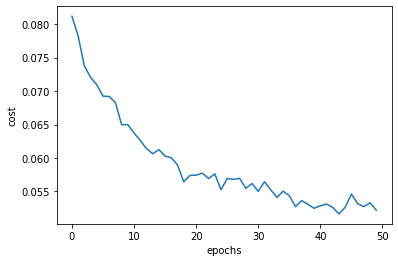

In [10]:
plt.plot(err)
plt.xlabel('epochs')
plt.ylabel('cost')